-------------------------------------------------------------------------------------------------------------------
so here we have a dataset about the ford car and  we can predict the price on the basis of that data 
we have diffrent features like (model	year	price	transmission	mileage	fuelType	tax	mpg	engineSize) so in this price is our target feature 
and we can predict the price of the car on the basis of all that feature and also we will see that if any column are not releted to our target column(price)
then we will drop it
----------------------------------------------------------------------------------------------------------------------

# Importing libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# -----------------------------
# Load Data
# -----------------------------

In [2]:
df = pd.read_csv("ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
# -----------------------------
# initial EDA
# -----------------------------
print("Shape:", df.shape)


print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())


Shape: (17966, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
None
               year         price        mileage           tax           mpg  \
count  17966.000000  17966.000000   17966.000000  17966.000000  17966.000000   
mean    2016.866470  12279.534844   23362.608761    113.329456     57.906980   
std        2.050336   4741.343657   19472.054349     62.012456     10.125696   
min     1996.0

In [4]:
df = df[df['year'] <= 2024]

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


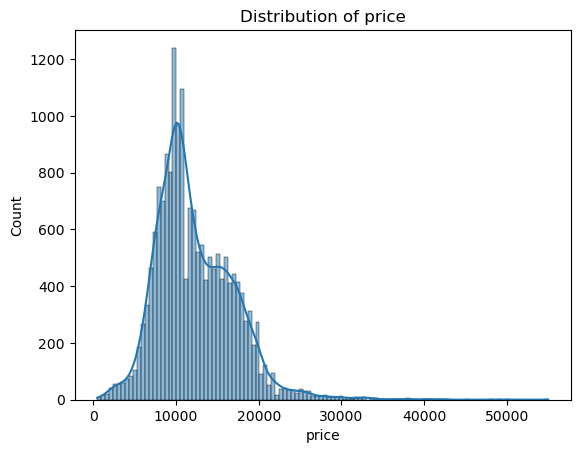

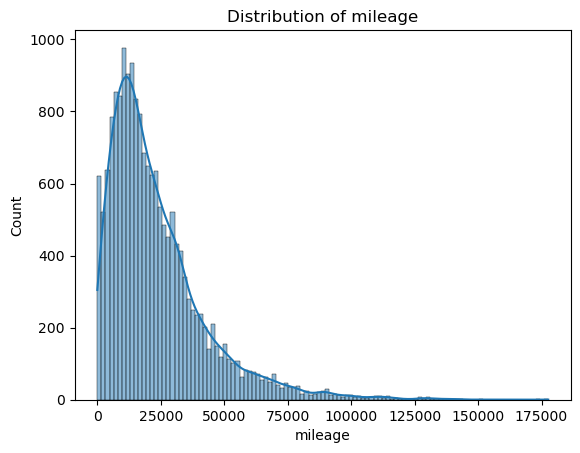

In [6]:
# Distribution plots
for col in ['price', 'mileage']:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [7]:
# -----------------------------
# Outlier Removal Function
# -----------------------------
def remove_outliers(df, col):
    max_value = df[col].quantile(0.99)
    min_value = df[col].quantile(0.01)
    df = df[(df[col] < max_value) & (df[col] > min_value)]
    return df


In [8]:
# Removing outliers from price and mileage
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'mileage')

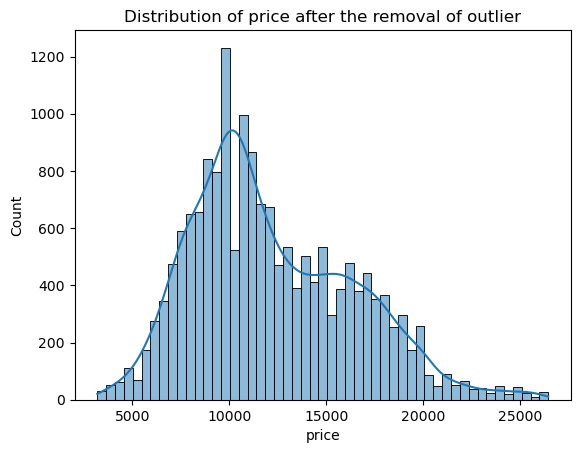

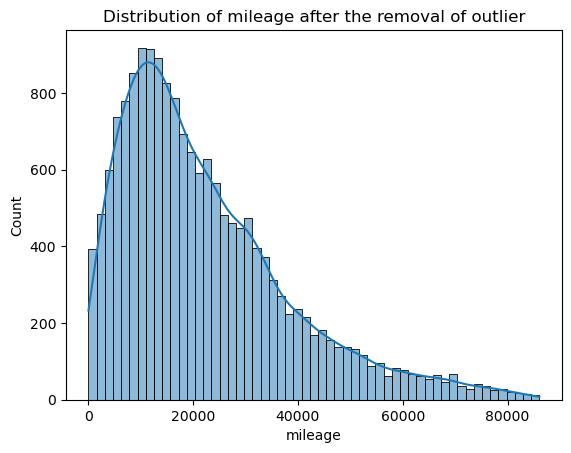

In [9]:
# Distribution plots
for col in ['price', 'mileage']:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col} after the removal of outlier")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


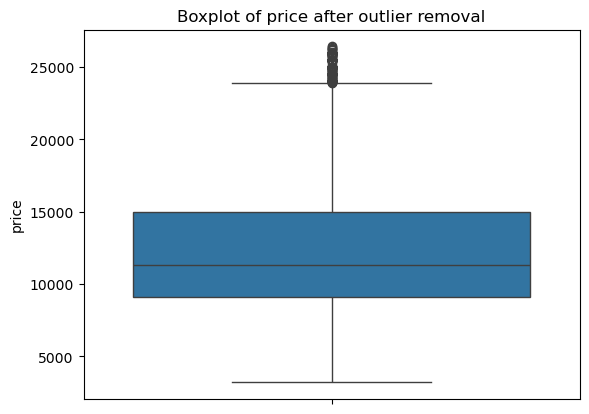

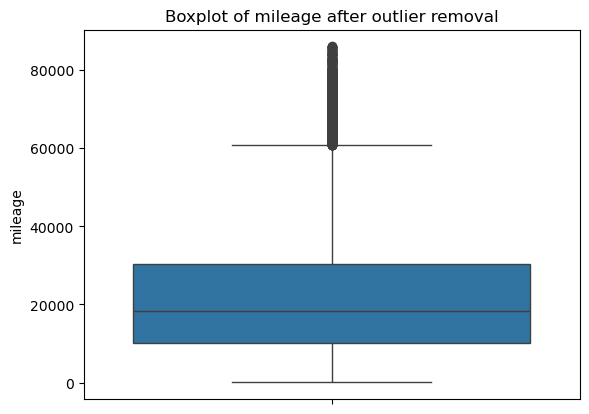

In [10]:
# Boxplots after outlier removal
for col in ['price', 'mileage']:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col} after outlier removal")
    plt.show()

In [11]:
# -----------------------------
# Feature Engineering
# -----------------------------
df['age_of_car'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
0,Fiesta,12000,Automatic,15944,Petrol,150,57.7,1.0,8
1,Focus,14000,Manual,9083,Petrol,150,57.7,1.0,7
2,Focus,13000,Manual,12456,Petrol,150,57.7,1.0,8
3,Fiesta,17500,Manual,10460,Petrol,145,40.3,1.5,6
4,Fiesta,16500,Automatic,1482,Petrol,145,48.7,1.0,6


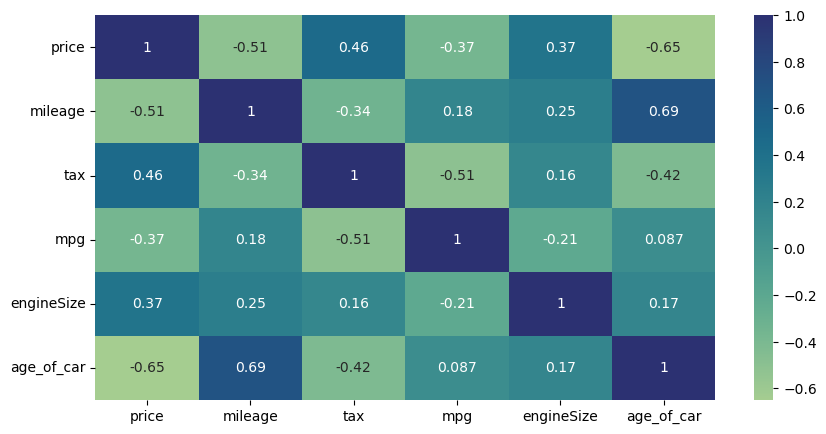

In [12]:
# -----------------------------
# Correlation Analysis
# -----------------------------
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')
plt.show()

In [13]:
# -----------------------------
# One-Hot Encoding for Categorical Columns
# -----------------------------
categorical_cols = ['model', 'transmission', 'fuelType']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [14]:
# -----------------------------
# Split Data into Features and Target
# -----------------------------
x = df.drop('price', axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)


In [15]:
# -----------------------------
# Scaling Numeric Features
# -----------------------------
numeric_cols = ['mileage', 'tax', 'age_of_car']
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [16]:
# -----------------------------
# Model Training
# -----------------------------
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
# -----------------------------
# Model Prediction and Evaluation
# -----------------------------
y_pred = lr.predict(x_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 2543880.17
Root Mean Squared Error: 1594.95
Mean Absolute Error: 1246.02
R2 Score: 0.85


In [20]:
# -----------------------------
# Save Model
# -----------------------------
joblib.dump(lr, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'
